In [6]:
import torch

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'heart-disease-dataset' dataset.
Path to dataset files: /kaggle/input/heart-disease-dataset


In [7]:
path

'/kaggle/input/heart-disease-dataset'

In [8]:
path = path+'/heart.csv'

import shutil

shutil.copy(path, '/content')

'/content/heart.csv'

In [9]:
import pandas as pd

data = pd.read_csv('/content/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [10]:
data.drop_duplicates(inplace=True)

In [11]:
for col in data.columns:
  data[col] = data[col].astype(float) # converting to `float` as we are performing z-score scaling/normalizatino

data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68.0,0.0,2.0,120.0,211.0,0.0,0.0,115.0,0.0,1.5,1.0,0.0,2.0,1.0
733,44.0,0.0,2.0,108.0,141.0,0.0,1.0,175.0,0.0,0.6,1.0,0.0,2.0,1.0
739,52.0,1.0,0.0,128.0,255.0,0.0,1.0,161.0,1.0,0.0,2.0,1.0,3.0,0.0
843,59.0,1.0,3.0,160.0,273.0,0.0,0.0,125.0,0.0,0.0,2.0,0.0,2.0,0.0


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data.iloc[:,:-1] = scaler.fit_transform(data.iloc[:,:-1])

In [13]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,0.682656,-0.935208,-0.376556,-0.667728,-0.418446,0.901657,0.806035,-0.698344,-0.037124,0.979514,1.274980,1.119967,0.0
1,-0.157260,0.682656,-0.935208,0.478910,-0.841918,2.389793,-1.002541,0.237495,1.431958,1.773958,-2.271182,-0.714911,1.119967,0.0
2,1.724733,0.682656,-0.935208,0.764066,-1.403197,-0.418446,0.901657,-1.074521,1.431958,1.342748,-2.271182,-0.714911,1.119967,0.0
3,0.728383,0.682656,-0.935208,0.935159,-0.841918,-0.418446,0.901657,0.499898,-0.698344,-0.899544,0.979514,0.280034,1.119967,0.0
4,0.839089,-1.464866,-0.935208,0.364848,0.919336,2.389793,0.901657,-1.905464,-0.698344,0.739054,-0.645834,2.269926,-0.513994,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,-1.464866,1.005911,-0.661712,-0.687083,-0.418446,-1.002541,-1.511859,-0.698344,0.394086,-0.645834,-0.714911,-0.513994,1.0
733,-1.153610,-1.464866,1.005911,-1.346085,-2.041893,-0.418446,0.901657,1.112172,-0.698344,-0.382092,-0.645834,-0.714911,-0.513994,1.0
739,-0.267966,0.682656,-0.935208,-0.205463,0.164513,-0.418446,0.901657,0.499898,1.431958,-0.899544,0.979514,0.280034,1.119967,0.0
843,0.506972,0.682656,1.976470,1.619532,0.512893,-0.418446,-1.002541,-1.074521,-0.698344,-0.899544,0.979514,-0.714911,-0.513994,0.0


In [14]:
from torch.utils.data import Dataset

train, test = data.iloc[:int(0.8*len(data)),:], data.iloc[int(0.8*len(data)):, :]

class custom_data(Dataset):
  def __init__(self, inp):
    self.data = torch.tensor(inp.values, dtype=torch.float)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx,:-1], self.data[idx, -1]


In [15]:
train = custom_data(train)
test = custom_data(test)

In [16]:
len(train), len(test)

(241, 61)

In [32]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test, batch_size=32, shuffle=True)

In [33]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(13, 16), nn.ReLU(),
    # nn.Linear(8, 1), nn.ReLU(),
    nn.Linear(16, 1), nn.Sigmoid()
)

In [34]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-3)
loss_fn = nn.BCELoss()

In [35]:
l_tr = []
l_ts = []

In [37]:
epochs = 50

for epoch in range(epochs):
    train_loss = test_loss = acc = 0
    model.train()

    for btch_no, (x_train, y_train) in enumerate(train_dataloader):
        optimizer.zero_grad()
        y_train_pred = model(x_train).squeeze()
        loss = loss_fn(y_train_pred, y_train)
        train_loss += loss


        loss.backward()
        optimizer.step()

    train_loss /= len(train_dataloader)

    model.eval()
    with torch.inference_mode():
        for x_test, y_test in test_dataloader:
            y_test_pred = model(x_test).squeeze()
            test_loss += loss_fn(y_test_pred, y_test)
            acc += torch.sum(torch.round(y_test_pred.float()) == y_test)

        test_loss /= len(test_dataloader)
        acc = (acc/len(test)) * 100

    l_tr.append(train_loss.detach())
    l_ts.append(test_loss)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Train loss: {train_loss: .4f} | Test loss: {test_loss: .4f} | Test Accuracy:{acc: .2f}")

print(f"Epoch: {epoch} | Train loss: {train_loss: .4f} | Test loss: {test_loss: .4f} | Test Accuracy:{acc: .2f}")

Epoch: 0 | Train loss:  0.1345 | Test loss:  0.8704 | Test Accuracy: 73.77
Epoch: 10 | Train loss:  0.1197 | Test loss:  0.9314 | Test Accuracy: 72.13
Epoch: 20 | Train loss:  0.0947 | Test loss:  0.9892 | Test Accuracy: 70.49
Epoch: 30 | Train loss:  0.0810 | Test loss:  1.0074 | Test Accuracy: 70.49
Epoch: 40 | Train loss:  0.0744 | Test loss:  1.0483 | Test Accuracy: 70.49
Epoch: 49 | Train loss:  0.0714 | Test loss:  1.0696 | Test Accuracy: 72.13


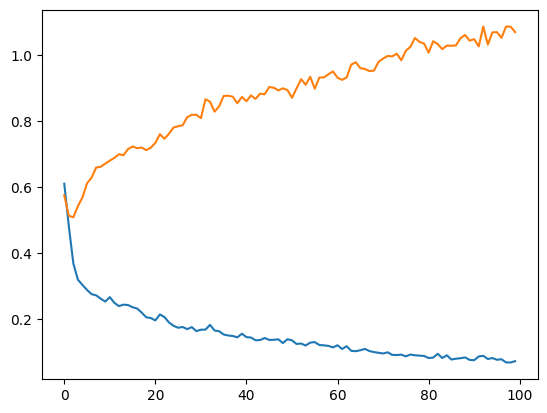

In [38]:
import matplotlib.pyplot as plt

plt.plot(l_tr, label='Train Loss')
plt.plot(l_ts, label='Test Loss')
